In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
#Here we import the data matrix
x_y_coordinatesMat = np.load('/Users/nadaelarabi/MATH-494/M494H2/x_y_coordinateMatrix.npy')

In [3]:
x_y_coordinatesMat.shape

(6, 225)

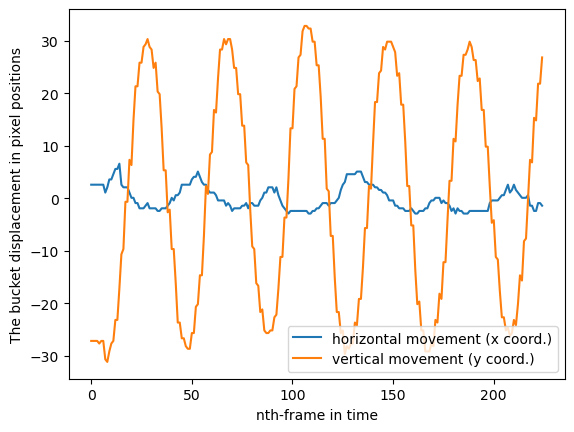

In [137]:
plt.plot(x_y_coordinatesMat[0,:], label = "horizontal movement (x coord.)")
plt.plot(x_y_coordinatesMat[1,:],label = "vertical movement (y coord.)")
#plt.title('Displacement with respect to original coordinate position, 1st camera, minimal noise')
plt.xlabel('nth-frame in time')
plt.ylabel('The bucket displacement in pixel positions')
plt.legend()

plt.savefig('Displ_camera1_minnoise.png')


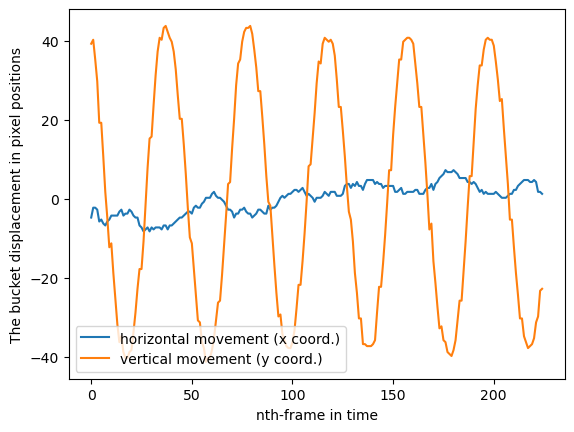

In [138]:
plt.plot(x_y_coordinatesMat[2,:],label = "horizontal movement (x coord.)")
plt.plot(x_y_coordinatesMat[3,:],label = "vertical movement (y coord.)")
#plt.title('Displacement with respect to original coordinate position, 2nd camera, minimal noise')
plt.xlabel('nth-frame in time')
plt.ylabel('The bucket displacement in pixel positions')
plt.legend()

plt.savefig('Displ_camera2_minnoise.png')

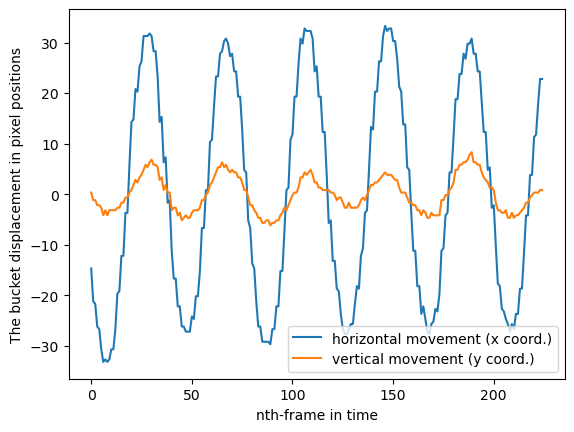

In [139]:
plt.plot(x_y_coordinatesMat[4,:],label = "horizontal movement (x coord.)")
plt.plot(x_y_coordinatesMat[5,:],label = "vertical movement (y coord.)")
#plt.title('Displacement with respect to original coordinate position, 3rd camera, minimal noise')
plt.xlabel('nth-frame in time')
plt.ylabel('The bucket displacement in pixel positions')
plt.legend()
plt.savefig('Displ_camera3_minnoise.png')

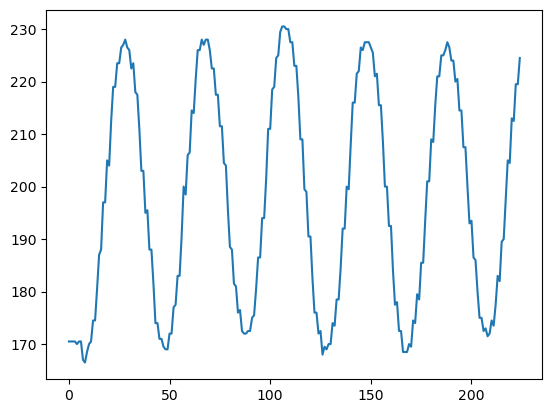

In [4]:
plt.plot(x_y_coordinatesMat[1,:])

In [5]:
#Let's try to compute the mean a bit differently
row1_x = x_y_coordinatesMat[0,:]
row1_y = x_y_coordinatesMat[1,:]
row2_x = x_y_coordinatesMat[2,:]
row2_y = x_y_coordinatesMat[3,:]
row3_x = x_y_coordinatesMat[4,:]
row3_y = x_y_coordinatesMat[5,:]

mean_x1 = np.mean(row1_x)
mean_y1 = np.mean(row1_y)
mean_x2 = np.mean(row2_x)
mean_y2 = np.mean(row2_y)
mean_x3 = np.mean(row3_x)
mean_y3 = np.mean(row3_y)

x_y_coordinatesMat[0,:] = x_y_coordinatesMat[0,:] - mean_x1
x_y_coordinatesMat[1,:] = x_y_coordinatesMat[1,:] - mean_y1
x_y_coordinatesMat[2,:] = x_y_coordinatesMat[2,:] - mean_x2
x_y_coordinatesMat[3,:] = x_y_coordinatesMat[3,:] - mean_y2
x_y_coordinatesMat[4,:] = x_y_coordinatesMat[4,:] - mean_x3
x_y_coordinatesMat[5,:] = x_y_coordinatesMat[5,:] - mean_y3

x_y_coordinatesMat

array([[  2.61111111,   2.61111111,   2.61111111, ...,  -0.88888889,
         -0.88888889,  -1.38888889],
       [-27.14666667, -27.14666667, -27.14666667, ...,  21.85333333,
         21.85333333,  26.85333333],
       [ -4.73111111,  -2.23111111,  -2.23111111, ...,   1.76888889,
          1.76888889,   1.26888889],
       [ 39.24888889,  40.24888889,  35.24888889, ..., -29.75111111,
        -23.25111111, -22.75111111],
       [-14.70888889, -21.20888889, -21.70888889, ...,  17.79111111,
         22.79111111,  22.79111111],
       [  0.31333333,  -1.18666667,  -1.18666667, ...,   0.31333333,
          0.81333333,   0.81333333]])

In [6]:
# zero_mean_matrix #QUESTION: Is it normal to have negative values in here? -> yes

In [7]:
#Now we proceed to construct the covariance matrix, which allows us to figure out which variables are most 
#related to each other 

covariance_Matrix = np.cov(x_y_coordinatesMat)

In [8]:
covariance_Matrix

array([[  5.10143849, -29.5093006 ,  -0.93291171, -21.81684028,
        -28.65414187,  -3.96688988],
       [-29.5093006 , 448.636875  ,   6.86550595,   5.00095238,
        450.80739583,  66.64995536],
       [ -0.93291171,   6.86550595,  14.60259921, -39.15874008,
          9.62896329,   1.10622024],
       [-21.81684028,   5.00095238, -39.15874008, 837.83063492,
         -5.22344742,   6.38706845],
       [-28.65414187, 450.80739583,   9.62896329,  -5.22344742,
        464.72402778,  69.77779762],
       [ -3.96688988,  66.64995536,   1.10622024,   6.38706845,
         69.77779762,  12.23732143]])

In [9]:
#Now we need to diagonalize our covariance matrix to remove redundancies. Recall that a diagonalized cov matrix
#implies that the off diagonals are zero (or close to it) meaning that our variables are independent of each other

#This is can be achieved through the SVD
u,s,vt = np.linalg.svd(x_y_coordinatesMat)

In [10]:
#there are our PC's!
ut = u.transpose()

In [11]:
#We can switch to the basis of the PC's by doing the following:
Y = np.matmul(ut,x_y_coordinatesMat)

In [12]:
#Now we can check the covariance of Y
covarianceMat_Y = np.cov(Y)

In [13]:
covarianceMat_Y #QUESTION: The result is very diagonalized at all

array([[ 9.19868824e+02,  6.29337852e-14, -2.33146835e-14,
         1.34495589e-13, -1.92036863e-13, -8.53920109e-14],
       [ 6.29337852e-14,  8.40356016e+02,  7.02929778e-14,
        -8.42500672e-14,  3.24438888e-13,  2.11893994e-14],
       [-2.33146835e-14,  7.02929778e-14,  1.30678913e+01,
        -3.29894842e-15,  1.29261681e-15,  6.26582120e-15],
       [ 1.34495589e-13, -8.42500672e-14, -3.29894842e-15,
         6.25948116e+00,  7.60899280e-15, -4.08403470e-15],
       [-1.92036863e-13,  3.24438888e-13,  1.29261681e-15,
         7.60899280e-15,  2.21313920e+00,  4.15342364e-16],
       [-8.53920109e-14,  2.11893994e-14,  6.26582120e-15,
        -4.08403470e-15,  4.15342364e-16,  1.36754482e+00]])

In [14]:
s

array([453.92798609, 433.86604808,  54.10367505,  37.44494332,
        22.26529093,  17.50228672])

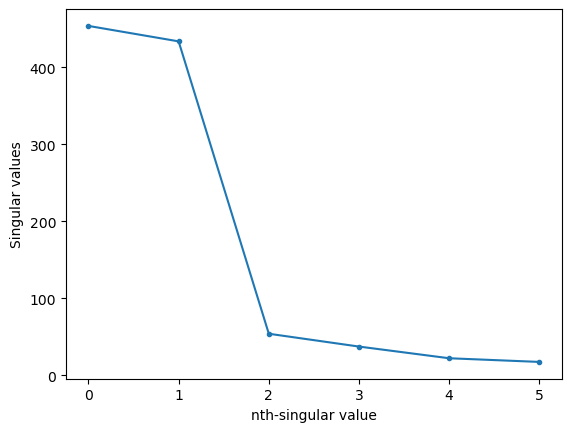

In [140]:
#We can plot the singular values
plt.plot(s,marker='.')
plt.xlabel('nth-singular value')
plt.ylabel('Singular values')
#plt.title('Plot of singular values of minimal noise data')
plt.savefig('svMinNoise.png')

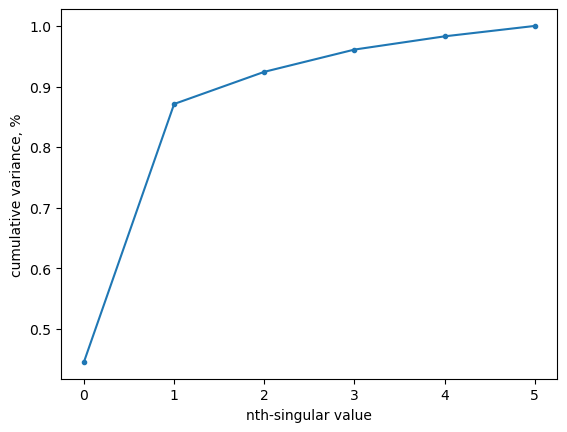

In [141]:
plt.plot(np.cumsum(s)/np.sum(s), marker='.')
plt.xlabel('nth-singular value')
plt.ylabel('cumulative variance, %')
#plt.title('Cumulative sum of variance captured by first nth-singular vectors ')
plt.savefig('svCumulativeMinNoise.png')

array([6.11793856, 6.07273584, 3.99090211, 3.62287168, 3.10302901,
       2.86233154])

In [15]:
######## WHat if I use the eigenvectors instead? #########

eigenvalues, eigenvectors = np.linalg.eig(covariance_Matrix)


In [16]:
eigenvectorsTranspose = eigenvectors.transpose()

In [17]:
Y2 = np.matmul(eigenvectorsTranspose,x_y_coordinatesMat)

In [18]:
Y2

array([[-29.00203971, -33.72361778, -34.13623019, ...,  27.56394731,
         31.23552159,  34.73767605],
       [ 39.64960848,  40.61991808,  35.63558869, ..., -30.09862246,
        -23.68282471, -23.16126219],
       [ -0.76835934,   0.88017311,   0.59746522, ...,  -0.6924003 ,
          0.21321963,  -0.95634676],
       [ 10.40060434,   5.60885274,   5.27460319, ...,  -3.89480175,
         -0.66086868,  -3.95481837],
       [  1.04540308,  -0.63105127,  -0.61230064, ...,  -0.35931422,
          0.53131073,  -0.25938079],
       [  0.04604303,   0.20777744,   0.41804726, ...,  -1.32718614,
         -2.21341306,  -1.60538051]])

In [19]:
covarianceMat_Y2 = np.cov(Y2)

In [20]:
covarianceMat_Y2 #Conclusion: works dramatically better with eigenvector decomposition than SVD

array([[ 9.19868824e+02, -6.27307730e-13, -9.48130463e-14,
         1.61140942e-13,  1.82710989e-13,  7.62564615e-14],
       [-6.27307730e-13,  8.40356016e+02,  1.95399252e-13,
        -1.67485073e-13, -1.16668580e-13, -6.28069025e-14],
       [-9.48130463e-14,  1.95399252e-13,  1.30678913e+01,
        -4.93256230e-14,  7.53365624e-16, -5.40242454e-16],
       [ 1.61140942e-13, -1.67485073e-13, -4.93256230e-14,
         6.25948116e+00,  3.52297556e-14, -5.13081641e-14],
       [ 1.82710989e-13, -1.16668580e-13,  7.53365624e-16,
         3.52297556e-14,  2.21313920e+00, -2.69199345e-14],
       [ 7.62564615e-14, -6.28069025e-14, -5.40242454e-16,
        -5.13081641e-14, -2.69199345e-14,  1.36754482e+00]])

In [21]:
eigenvalues

array([919.86882391, 840.35601642,  13.06789131,   6.25948116,
         2.2131392 ,   1.36754482])

In [22]:
s

array([453.92798609, 433.86604808,  54.10367505,  37.44494332,
        22.26529093,  17.50228672])

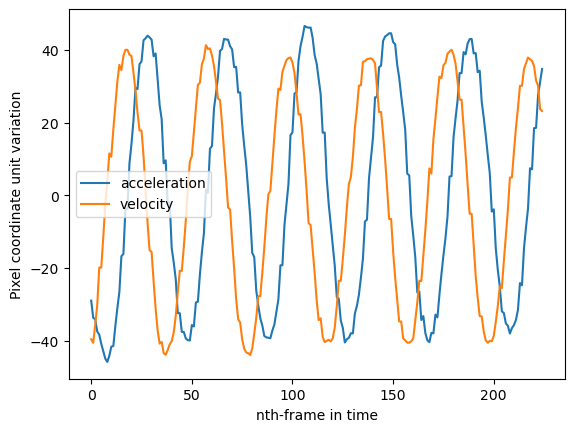

In [142]:
plt.plot(s[0]*vt[0,:], label = 'acceleration')
plt.plot(s[1]*vt[1,:], label = 'velocity')
plt.xlabel('nth-frame in time')
plt.ylabel('Pixel coordinate unit variation')
#plt.title('Evolution of acceleration and velocity in time')
plt.legend()
plt.savefig('avMinNoise.png')



#Note that the blue curve is acceleration and the orange curve is its derivative, velocity
#s[0]*vt[0,:], s[1]*vt[1,:]

In [24]:
import pysindy as ps

In [25]:
x_y_coordinatesMat

array([[  2.61111111,   2.61111111,   2.61111111, ...,  -0.88888889,
         -0.88888889,  -1.38888889],
       [-27.14666667, -27.14666667, -27.14666667, ...,  21.85333333,
         21.85333333,  26.85333333],
       [ -4.73111111,  -2.23111111,  -2.23111111, ...,   1.76888889,
          1.76888889,   1.26888889],
       [ 39.24888889,  40.24888889,  35.24888889, ..., -29.75111111,
        -23.25111111, -22.75111111],
       [-14.70888889, -21.20888889, -21.70888889, ...,  17.79111111,
         22.79111111,  22.79111111],
       [  0.31333333,  -1.18666667,  -1.18666667, ...,   0.31333333,
          0.81333333,   0.81333333]])

In [26]:
x_y_coordinates_reduced = (u[:,0:2].transpose())@x_y_coordinatesMat

In [27]:
x_y_coordinates_reduced.shape

(2, 225)

In [28]:
x_y_coordinates_reduced = x_y_coordinates_reduced.transpose()

In [29]:
x = x_y_coordinates_reduced[:,0]
y = x_y_coordinates_reduced[:,1]

In [30]:
featureNames = ['x','y']

In [143]:
opt = ps.STLSQ(threshold = 0.1)

In [144]:
model = ps.SINDy(feature_names = featureNames,optimizer = opt)

In [145]:
model.fit(x_y_coordinates_reduced,t = 11/226)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x', 'y'],
      optimizer=STLSQ())

In [146]:
model.print()

(x)' = 5.560 1 + 3.279 y
(y)' = 5.665 1 + -2.989 x


In [ ]:
#Figure out plotting to check results 